## Aplicación de la estadística descriptica en la ingeniería de confiabilidad.

Para facilitar el aprendizaje de la teoría aquí planteada realizaremos un ejercicio con datos reales de parámetros que caracterizan los yacimientos de crudo. Esta data se utilizará a lo largo de las diferentes etapas de desarrollo de los ejercicios prácticos.

**1. Histograma de frecuencia acumulado**


En ocasiones estamos interesados en contestar preguntas como:

¿Cuál es la probabilidad de que X tome un valor menor o igual a determinado valor?

Para contestar esta pregunta es conveniente organizar gráficamente la información en la forma de un Histograma Acumulado Directo. De igual manera para facilitar el análisis de la información crearemos una función que grafique el histograma acumulado y nos entregue la información en forma de tabla para su posterior análisis. 

In [1]:
# Importamos las librerías necesarias para el trabajo con los datos
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math as mth

In [2]:
# Importamos los datos del yacimiento

DATA = pd.read_csv("EJERCICIO 1.csv")
DATA.head(10)

,POROSIDAD,ARENA
0,0.2370,130.293
1,0.2266,37.000
2,0.2179,41.037
3,0.2240,52.500
4,0.2319,86.092
5,0.2400,43.223
6,0.2413,56.500
7,0.2436,24.035
8,0.2331,35.963
9,0.2376,35.864


In [3]:
#Aislamos la data en una variable porosidad y una para arena definimos el total de elementos de la serie
porosidad = DATA["POROSIDAD"]
arena = DATA["ARENA"]

La manera más sencilla de realizarlo es con el uso de la librería pyplot, y condicionando unos parámetros adicionales recibiremos el array de densidad para cada intervalo encontrado automáticamente.
De manera natural el histograma que ofrece la librería por defecto no me ofrece mayor información respecto del comportamiento de los datos. Aunque la imagen y la tabla es útil para construir rápidamente un reporte gerencial, para un análisis profundo de ingeniería se requiere de la presentación de los datos de una manera legible. En el siguiente script encontraras una formula rápida de elaborar el histograma acumulado con toda la información posible respecto al comportamiento de los datos.


(array([0.01010101, 0.02020202, 0.06060606, 0.09090909, 0.15151515,
        0.25252525, 0.41414141, 0.61616162, 0.84848485, 1.        ]),
 array([0.1649 , 0.17277, 0.18064, 0.18851, 0.19638, 0.20425, 0.21212,
        0.21999, 0.22786, 0.23573, 0.2436 ]),
 <BarContainer object of 10 artists>)

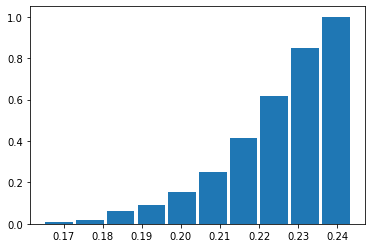

In [5]:
plt.hist(porosidad, bins="auto" , density = True, cumulative= True, rwidth=0.9)

**Histograma avanzado de frecuencia acumulado:**

Para presentar la misma información, pero de manera más útil para un informe de gestión por ejemplo, podemos utilizar el siguiente script el cual organiza la información de manera tabular y construye la gráfica con las leyendas de manera automática. Esta información nos permite realizar las siguientes afirmaciones respecto a la probabilidad (P) de que un valor sea mayor, menor o igual a un criterio predefinido:


In [6]:
# A continuacion se define una funcion para construir el histrograma acumulado, con el objetivo de exporta una tabla de 
# resultados para su posterior analisis. 

def histo_cum(data, nombre):
    #Definimos variables globales, esta variable sera el dataframe que contendra la tabla de resultados del histrograma
    global hmatrix_frame_cum
    # Definimos la cantidad de elementos
    cant_elemt = data.count()
    # Definimos el numero de clases
    k = round(mth.sqrt(cant_elemt))
    # Definimos parametros basicos del histograma, tanto por puntos como por densidad de poblacion
    n, bins = np.histogram(data, bins=k)
    a =plt.hist(data, bins="auto" , density = True, cumulative= True, rwidth=0.9)
    cum =a[0]
    # Creamos variable para almacenar las clases
    clases=[]
    # Creamos variable para almacenar la tabla de resultados
    matrix =[]
    # Construimos el array de clases
    for i in range(0,k):
        par_val=(round(bins[i],4),round(bins[i+1],4))
        clases.append(par_val)
    for i in range(0,k):
        diccionario ={"Clases":clases[i],"# Puntos":n[i],"Probabilidad":cum[i]}
        matrix.append(diccionario)
    matrix_frame_cum = pd.DataFrame(matrix)
   
    #Construimos el histograma
    plt.title(nombre)
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.75)

    return plt.show(), matrix_frame_cum

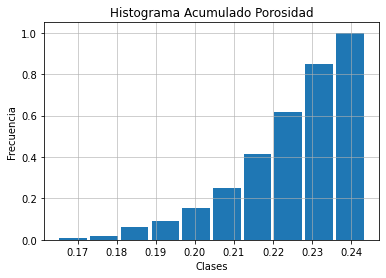

(None,
              Clases  # Puntos  Probabilidad
 0  (0.1649, 0.1728)         1      0.010101
 1  (0.1728, 0.1806)         1      0.020202
 2  (0.1806, 0.1885)         4      0.060606
 3  (0.1885, 0.1964)         3      0.090909
 4  (0.1964, 0.2042)         6      0.151515
 5  (0.2042, 0.2121)        10      0.252525
 6    (0.2121, 0.22)        16      0.414141
 7    (0.22, 0.2279)        20      0.616162
 8  (0.2279, 0.2357)        23      0.848485
 9  (0.2357, 0.2436)        15      1.000000)

In [7]:
histo_cum(porosidad,"Histograma Acumulado Porosidad")

Del Histograma Acumulado Directo construido para la variable aleatoria “Porosidad” podemos inferir entre otras cosas, lo siguiente:

1.	p(P ≤ 0.2436 micras ) = 100% (probabilidad de que porosidad tome valores menores o iguales de 0.2436 micras es de 100%)
2.	p(P ≤ 0.2279 micras ) = 84.84% (probabilidad de que la porosidad tome valores menores o iguales de 0.2279 micras es de 85%)
3.	p(P> 0.2279 micras)= 1-0.8484 =0.1516 =15.16% (probabilidad de que la porosidad tome valores mayores a 0.2279 micras es de 15.16%)


**4. Literatura utilizada**

Para la elaboración del presente documento se utilizaron muchas fuentes bibliográficas pero en especial las siguientes:

Libros:
 * Confiabilidad Integral, un enfoque práctico, R2M S.A
 
 Artículos:
 * Python Statistics Fundamentals: How to Describe Your Data - https://realpython.com/python-statistics/
 
 Documentación:
 * Toda la documentación de las librerías de SciPy - https://www.scipy.org/docs.html


_Realizó:_

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
javier8am@yahoo.com
Bogotá – Colombia_  